In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Analiza skupień na danych przestrzennych

Wczytaj dane zawierające współrzędne geograficzne. 

In [7]:
# load the data set
df = pd.read_csv('data_cl/summer-travel-gps-full.csv', delimiter="\t")
df.loc[:100,:]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
5,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom
6,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom
7,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
8,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal
9,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal


In [8]:
# how many rows are in this data set?
len(df)

1759

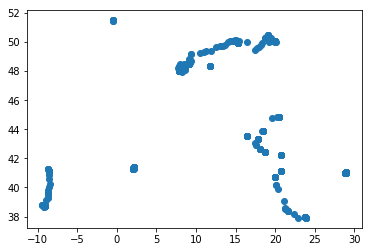

In [9]:
plt.scatter(df.iloc[:,1], df.iloc[:,0])
plt.show()

# Zad.

Narysuj dane na mapie.

https://rabernat.github.io/research_computing/intro-to-basemap.html

Jeśli nie działa

  * conda install basemap

to można spróbować:

  * conda install -c conda-forge basemap
  
http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/  

Później:

conda install -c conda-forge basemap-data-hires

In [10]:
from mpl_toolkits.basemap import Basemap

In [11]:
#!conda install -c conda-forge basemap-data-hires

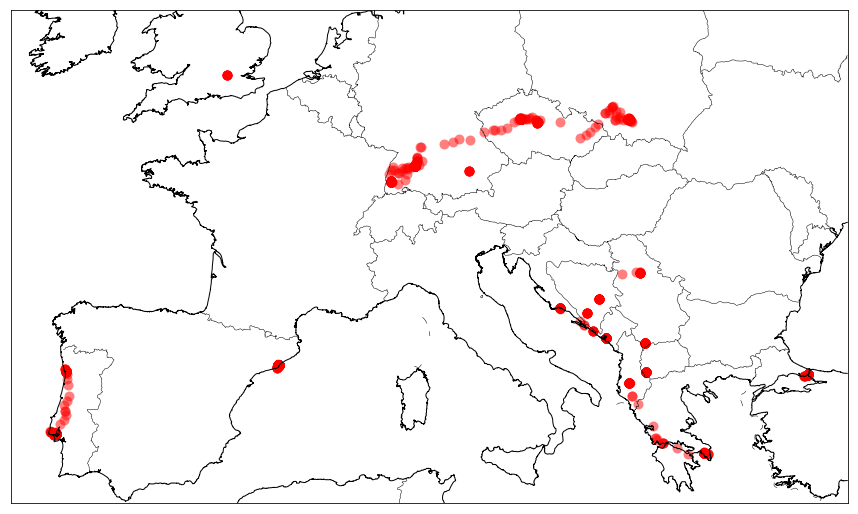

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', alpha=0.5, linewidth=0, s = 100)
plt.show()

# Zad. 

* Wykonaj klastrowanie DBSCAN tak aby grupy pokazały miejsca gdzie najczęściej przebywał podróżnik.
* Elementy odstające zaznacz szarym odcieniem
* pokoloruj każdy klaster innym kolorem

Odległość będziemy mierzyć w kilometrach 

In [13]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['lat', 'lon'])

# define the number of kilometers in one radian
kms_per_radian = 6371.0088

# define epsilon as 10 kilometers, converted to radians for use by haversine
epsilon = 10 / kms_per_radian

#convert coordinates to radians
np.radians(coords)

#we use haversine distance which requires radians as input

C:\Users\marek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 0.89851804, -0.00787163],
       [ 0.89839087, -0.00787142],
       [ 0.89846407, -0.00778558],
       ...,
       [ 0.84397638,  0.20580417],
       [ 0.84395968,  0.20580417],
       [ 0.84399079,  0.2057978 ]])

ZADANIE: Klastrujemy używając haversine metric na danych podanych w radianach. Ile klastrów dosaliśmy?

In [15]:
dbscan = DBSCAN(eps = epsilon, min_samples = 10, metric='haversine')
db = dbscan.fit(np.radians(coords))

cluster_labels = db.labels_
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels)

print(unique_labels)
print(num_clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}
18


ZADANIE: Narysujmy wynik na mapie

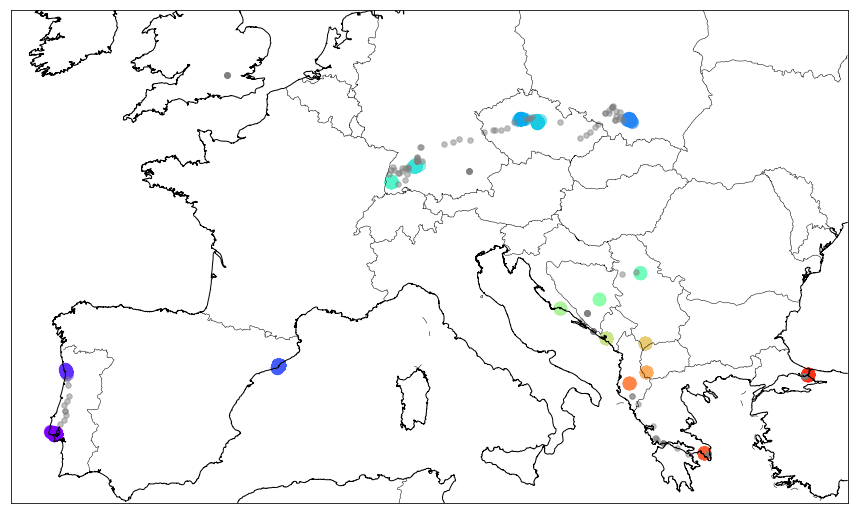

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for cluster_label,color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1:
        color = 'gray'
        size = 30

    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    lons, lats = m(x_coords, y_coords)
    m.scatter(lons, lats, c=color, s=size, alpha = 0.5)
    
plt.show()

# Zad. 

Za pomocą DBSCAN zrobiće ładną wizualizację

- uwzględnić, gdzie nasz podróżnik przebywał długo (zlokalizować te miejsca na podstawie danych GPS i przedstawić jako JEDEN PUNKT, uwzględnić w wizualizacji czas przebywania w danym miejscu).

In [21]:
df["cluster"] = cluster_labels

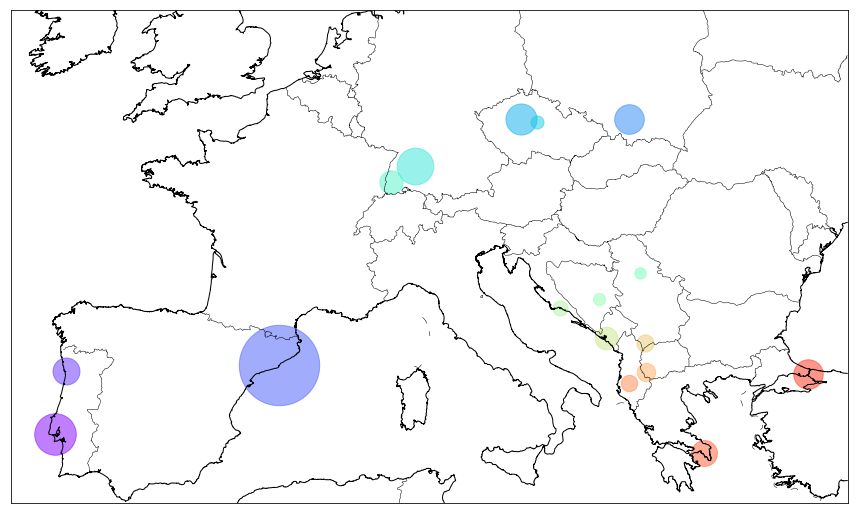

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))


for cluster_label,color in zip(unique_labels, colors):
    
    size = 10
    if cluster_label == -1:
        continue

    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    
    x= x_coords.mean()
    y= y_coords.mean()
    size = size*len(x_coords)
    
    lons, lats = m(x, y)
    m.scatter(lons, lats, c=color, s=size, alpha = 0.5)
    
plt.show()

# Klastrowanie w celu zmniejszenia rozmiaru zbioru danych

 * Zamiast klastrować w celu wykrycia grup można uzyć takiego podejścia by zmniejszyć rozmiar zbioru danych. 

 * Nawet w bardzo bliskim sąsiedztwie, kilka lokalizacji zawiera setki punktów danych ułożonych bezpośrednio jeden na drugim ze względu na czas spędzony w jednym miejscu. 

 * Jeśli nie interesuje nas dynamika czasu, po prostu nie potrzebujemy wszystkich punktów.
 
 # Zad.
 Wygeneruj nową tabelę zawieralącą dokładnie takie same kolumny ale usuwajac elementy odstające.

In [24]:
# set eps low (1.5km) so clusters are only formed by very close points
epsilon = 1.5 / kms_per_radian

# set min_samples to 1 so we get no noise - every point will be in a cluster even if it's a cluster of 1
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))

Clustered 1,759 points down to 138 clusters, for 92.2% compression in 0.06 seconds


In [26]:
clustered = [coords[cluster_labels == n] for n in range(num_clusters)]
centroids = np.zeros((num_clusters,2))
for i in range(num_clusters):
    centroids[i] = clustered[i].mean()
    
    

In [27]:
from scipy.spatial.distance import euclidean

representatives = np.zeros((num_clusters,2))

for i in range(num_clusters):
    dists = [euclidean(centroids[i], clustered[i][j,:]) for j in range(clustered[i].shape[0])]
    idx = np.argmin(dists)
    representatives[i] = clustered[i][idx,:]

In [28]:
representative_points = pd.DataFrame({'lon':representatives[:,1], 'lat':representatives[:,0]})
representative_points.tail()

,lon,lat
133,23.946075,37.933609
134,28.831658,40.984723
135,28.983455,41.011648
136,29.011215,41.014247
137,11.791710,48.355328


DBScan jest interesującą ale ciężko sterowalną metodą. Warto zobaczyć na rozszerzenia np. https://hdbscan.readthedocs.io/en/latest/

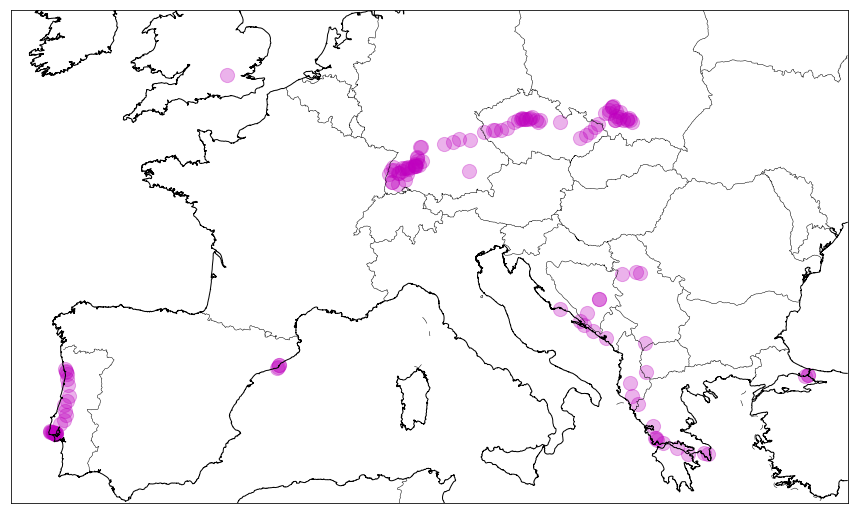

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()

lons1, lats1 = m(representative_points['lon'].values, representative_points['lat'].values)
lons2, lats2 = m(df['lon'].values, df['lat'].values)

m.scatter(lons1, lats1, c='m', alpha=0.3, s=200)

plt.show()